# StreetEasy Dataset

StreetEasy is New York City’s leading real estate marketplace — from studios to high-rises, Brooklyn Heights to Harlem.

Goal of this is to find the correlations between several features and the rent, build/evaluate a MLR model, and use the model to present interesting findings:

1. “Does having a washer/dryer in unit increase the price of rent?”
2. “How costly is living by a subway station in Brooklyn/Queens?”
3. And most importantly, “Is a tenant over or underpaying?”

The dataset contains a sample of 5,000 rentals listings in Manhattan, Brooklyn, and Queens, active on StreetEasy in June 2016.

In [4]:
import pandas as pd

df = pd.read_csv('manhattan.csv')

### Taking a look at the first few rows. 

In [5]:
print(df.head())

rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0        

### Setting up Training & Test Datasets

In [6]:
from sklearn.model_selection import train_test_split 

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
 
y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

Taking a look at the shape.....

In [7]:
print(x_train.shape)
print(x_test.shape)
 
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


### Setting up Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)

Testing model on sample data - Sonny's Apartment (Rent $2000)

In [9]:
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
 
predict = mlr.predict(sonny_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


### Visualizing Results with Matplotlib

Plotting a 2d scatter graph

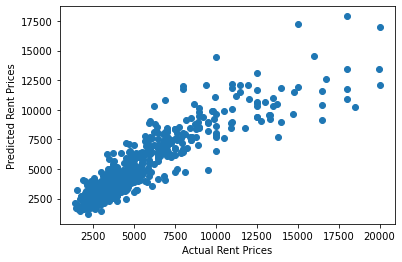

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict)

plt.xlabel('Actual Rent Prices')
plt.ylabel('Predicted Rent Prices')

plt.show()